# Negative testing: initial experiments

## let's take a cvasl datframe split a couple ways by age, then see how harmonization with neurocombat changes it



# Important Note: this must be run in the neuron_go environment

# Important Note: this notebook was last updated on Dec 2nd 2023, to include log based values in columns of dataframe

## import libraries

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuroCombat import neuroCombat
import seaborn as sns

sys.path.insert(0, '../') # path to some functions
import cvasl.harmony as har

## prepare data

In [2]:
filepath_mri = '../open_work/internal_results/cleaned_pvc2s/' 
filename_mri = os.path.join(filepath_mri,'StrokeMRI_pvc2c.csv') 

In [3]:
StrokeMRI  = pd.read_csv(filename_mri)
StrokeMRI.head(3)

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,1,sub-59082_1_ses-1_run-1,43.172603,F,0.64754,0.49441,0.31320,0.44500,0.78476,1.249,...,8.0434,1.7273,1.9776,1.7141,1.9140,26.8262,104.3155,90.5047,73.8758,84.4527
1,2,sub-59083_1_ses-1_run-1,66.367123,F,0.60517,0.48594,0.42304,0.39968,0.72061,14.597,...,3.7791,1.9669,1.7154,2.6394,1.8815,24.9597,75.7051,65.3032,65.6771,67.1158
2,4,sub-59085_1_ses-1_run-1,55.838356,F,0.61724,0.53779,0.33692,0.41371,0.77417,6.341,...,5.1248,1.8146,1.9845,2.0827,1.9501,27.7117,81.0966,72.9980,60.8317,64.3183


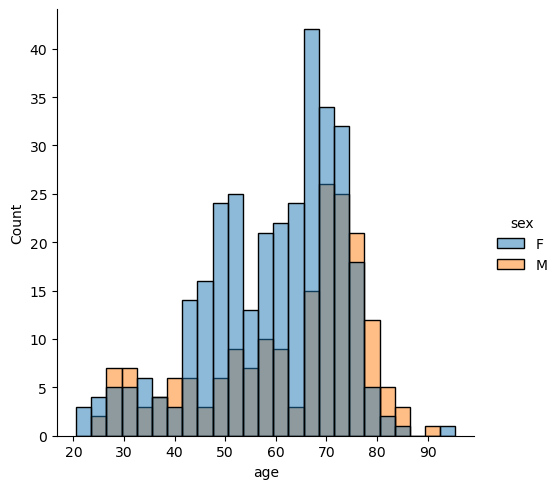

In [4]:
sns.displot(StrokeMRI, x='age', binwidth=3, hue= 'sex')

# ComBat assumes vectors of regression coefficients follow independent normal distributions and some other assumptions

Note: Combat-GAM GMM or Open Nestedmay leapfrog this and give better results, but let's not get ahead

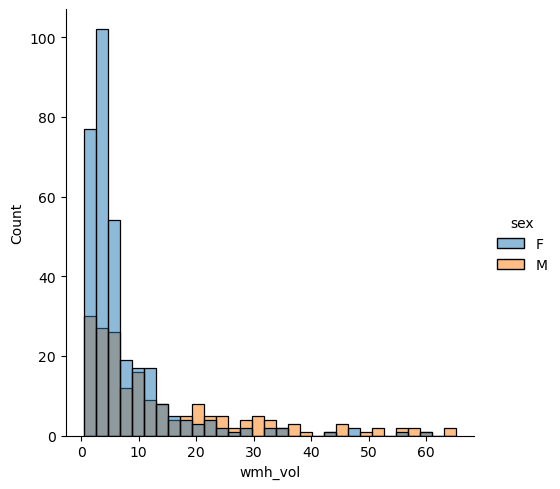

In [5]:
sns.displot(StrokeMRI, x='wmh_vol', hue= 'sex')

In [6]:
StrokeMRI.wmh_vol.describe()

count    514.000000
mean       9.745523
std       11.589581
min        0.553000
25%        2.966000
50%        5.135000
75%       11.508750
max       65.157000
Name: wmh_vol, dtype: float64

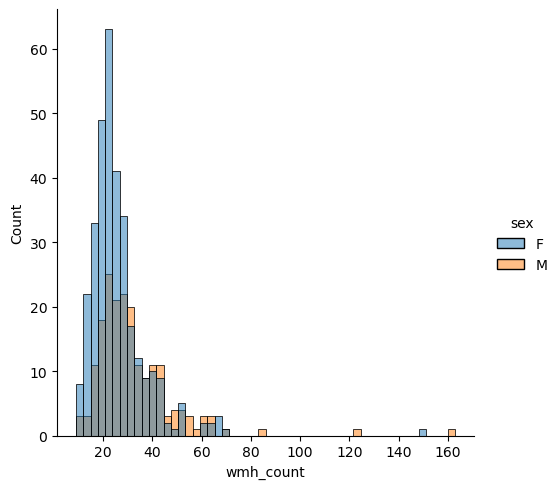

In [7]:
sns.displot(StrokeMRI, x='wmh_count', hue= 'sex')

In [8]:
loged_StrokeMRI = har.log_out_columns(StrokeMRI, ['wmh_vol', 'wmh_count'])

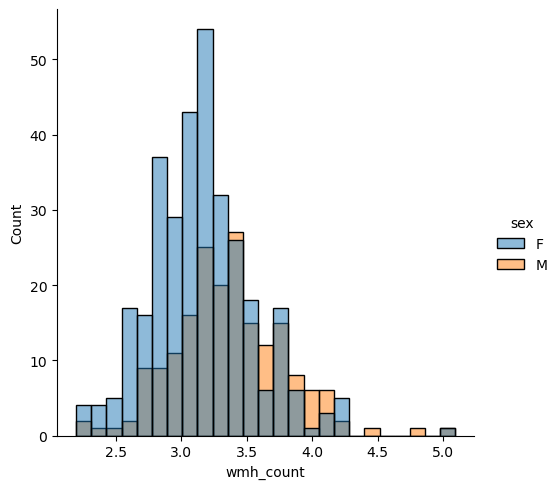

In [9]:
sns.displot(loged_StrokeMRI, x='wmh_count', hue= 'sex')

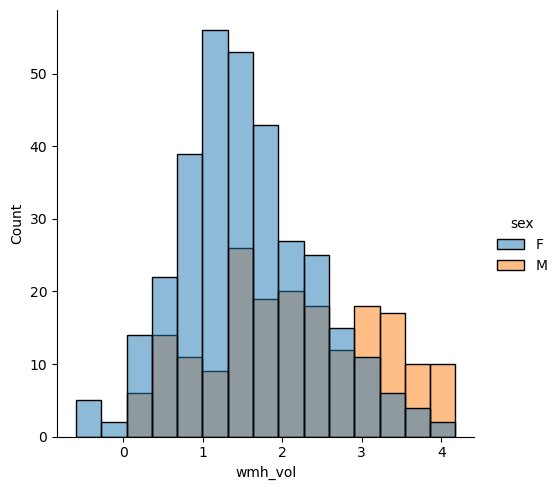

In [10]:
sns.displot(loged_StrokeMRI, x='wmh_vol', hue= 'sex')

## Let's try using the logged vals as they are closer to normally distributed

In [11]:
stroke_even_unharmonized = har.split_frame_half_balanced_by_column(loged_StrokeMRI, 'age')[0]
stroke_odd_unharmonized = har.split_frame_half_balanced_by_column(loged_StrokeMRI, 'age')[1]

In [12]:
stroke_even_unharmonized= stroke_even_unharmonized.drop('index', axis=1)
stroke_odd_unharmonized = stroke_odd_unharmonized.drop('index', axis=1)

In [13]:
stroke_even_unharmonized.to_csv('stroke_even_unharmonized.csv')
stroke_odd_unharmonized.to_csv('stroke_odd_unharmonized.csv') 

In [21]:
stroke_even_unharmonized.tail(6)

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
502,564,sub-59425_2_ses-2_run-1,80.624658,F,0.49804,0.44289,0.43743,0.36133,0.68264,3.573328,...,1.9829,2.3226,1.8878,2.2497,1.6943,21.7298,52.6921,46.4912,37.3209,42.3962
504,557,sub-59419_1_ses-1_run-1,81.657534,M,0.50173,0.44961,0.54970,0.33425,0.63379,4.019747,...,2.0278,3.6043,3.6783,3.1352,2.5996,29.6605,41.4430,36.2368,34.6355,33.1404
506,326,sub-59276_2_ses-2_run-1,83.347945,M,0.61494,0.45410,0.51456,0.38832,0.67507,3.077266,...,2.8212,3.6689,3.1018,3.1781,2.6916,24.1833,40.1696,31.6369,29.7774,30.3022
508,490,sub-59376_1_ses-1_run-1,84.624358,M,0.64391,0.51250,0.50601,0.38733,0.69562,3.950031,...,1.6571,1.8735,1.8043,1.5435,1.6397,29.6495,77.2704,66.3456,53.9741,60.8178
510,54,sub-59116_2_ses-2_run-1,85.776832,F,0.50279,0.33551,0.40553,0.40423,0.67397,2.504954,...,2.6097,1.8899,1.6466,2.1033,1.8811,24.8206,60.6278,52.4160,40.8453,47.6168
512,562,sub-59423_1_ses-1_run-1,92.049315,M,0.48135,0.39877,0.56566,0.33293,0.60875,3.545586,...,2.1008,2.1129,1.8008,2.4226,1.9997,33.8502,77.4641,62.7529,59.4109,56.4401


In [16]:
stroke_top_unharmonized = har.top_and_bottom_by_column(loged_StrokeMRI, 'age')[0]
stroke_bottom_unharmonized = har.top_and_bottom_by_column(loged_StrokeMRI, 'age')[1]

In [17]:
stroke_top_unharmonized.to_csv('stroke_top_unharmonized.csv')
stroke_bottom_unharmonized.to_csv('stroke_bottom_unharmonized.csv') 

In [20]:
stroke_bottom_unharmonized.head(6)

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
103,124,sub-59155_2_ses-2_run-1,64.293151,F,0.54416,0.43087,0.30275,0.42586,0.76307,0.559044,...,6.5104,1.9541,1.9661,1.8805,1.8818,22.5132,74.6704,66.0121,50.4524,57.9142
40,45,sub-59111_2_ses-2_run-1,64.367123,F,0.57855,0.46130,0.30358,0.43065,0.77403,1.444799,...,5.1275,1.6651,2.1264,1.6749,1.8392,27.2184,81.9694,69.0165,63.2677,67.3923
446,515,sub-59391_2_ses-2_run-1,64.441096,F,0.58870,0.45378,0.35242,0.42204,0.74735,2.141477,...,3.7613,2.0825,2.2581,1.9688,2.0218,26.8221,80.9290,66.5337,54.9269,60.2832
205,242,sub-59227_1_ses-1_run-1,64.617486,F,0.63947,0.49211,0.39936,0.41770,0.73914,1.747459,...,4.3678,2.1644,1.8519,2.1713,1.7002,25.5183,77.9773,69.3066,60.6663,65.1095
156,181,sub-59188_2_ses-2_run-1,64.731507,F,0.52855,0.39441,0.43657,0.38877,0.67888,1.599792,...,4.2815,1.9004,1.5720,1.8706,1.8931,28.2587,101.7275,87.5097,68.6720,73.7515
96,116,sub-59151_2_ses-2_run-1,64.926027,F,0.56303,0.48724,0.32181,0.41035,0.76546,1.046968,...,6.1655,1.8423,2.0260,1.7575,1.9316,23.0812,76.6777,69.8790,54.6059,61.0970


In [22]:
both_togetherF, ftF, btF, feature_dictF, len1, len2 = har.prep_for_neurocombat(stroke_even_unharmonized, stroke_odd_unharmonized)

Nan count 0


In [23]:
ftF.head(3)

participant_id,sub-59251_1_ses-1_run-1,sub-59147_1_ses-1_run-1,sub-59266_1_ses-1_run-1,sub-59203_1_ses-1_run-1,sub-59145_1_ses-1_run-1,sub-59330_1_ses-1_run-1,sub-59266_2_ses-2_run-1,sub-59259_1_ses-1_run-1,sub-59156_2_ses-2_run-1,sub-59132_1_ses-1_run-1,...,sub-59121_2_ses-2_run-1,sub-59430_1_ses-1_run-1,sub-59274_2_ses-2_run-1,sub-59430_2_ses-2_run-1,sub-59311_2_ses-2_run-1,sub-59276_1_ses-1_run-1,sub-59116_1_ses-1_run-1,sub-59295_2_ses-2_run-1,sub-59376_2_ses-2_run-1,sub-59358_1_ses-1_run-1
0,0.63411,0.69681,0.66222,0.74033,0.72457,0.69901,0.67701,0.83057,0.69112,0.6207,...,0.57227,0.59931,0.58286,0.60668,0.64069,0.60875,0.52201,0.63134,0.64732,0.46979
1,0.43188,0.45745,0.50684,0.4738,0.49672,0.56004,0.53701,0.58904,0.47556,0.42323,...,0.42548,0.48838,0.48259,0.45482,0.55084,0.48611,0.32417,0.49361,0.50652,0.35423
2,0.19721,0.23545,0.29944,0.30835,0.2196,0.29914,0.24229,0.26311,0.22294,0.30565,...,0.60803,0.61086,0.61895,0.65419,0.51908,0.51604,0.40673,0.48013,0.5128,0.46033


In [24]:
ftF.to_csv('ftF1_UH.csv')

In [25]:
data = np.genfromtxt('ftF1_UH.csv', delimiter=",", skip_header=1)
data = data[:, 1:]
data

array([[ 0.63411,  0.69681,  0.66222, ...,  0.63134,  0.64732,  0.46979],
       [ 0.43188,  0.45745,  0.50684, ...,  0.49361,  0.50652,  0.35423],
       [ 0.19721,  0.23545,  0.29944, ...,  0.48013,  0.5128 ,  0.46033],
       ...,
       [80.2063 , 75.0336 , 72.6971 , ..., 53.8498 , 66.6457 , 49.0843 ],
       [67.9731 , 60.6876 , 58.7849 , ..., 33.5675 , 48.0675 , 41.8283 ],
       [74.5803 , 69.1784 , 65.74   , ..., 43.2865 , 57.7995 , 47.0884 ]])

In [26]:
# Specifying the batch (scanner variable) as well as a sex covariate to preserve:
first_columns_as_one = [1] * len1
last_columns_as_two = [2] * len2
covars = {'batch':first_columns_as_one + last_columns_as_two,
          'sex':both_togetherF.loc['sex',:].values.tolist(),
           'age':both_togetherF.loc['age',:].values.tolist(),} 
covars = pd.DataFrame(covars) 

In [27]:
covars

,batch,sex,age
0,1,F,20.505464
1,1,F,23.483607
2,1,F,25.565574
3,1,F,26.084699
4,1,M,26.218744
...,...,...,...
509,2,M,81.718579
510,2,F,83.361644
511,2,M,84.873973
512,2,M,85.816139


In [29]:
data

array([[ 0.63411,  0.69681,  0.66222, ...,  0.63134,  0.64732,  0.46979],
       [ 0.43188,  0.45745,  0.50684, ...,  0.49361,  0.50652,  0.35423],
       [ 0.19721,  0.23545,  0.29944, ...,  0.48013,  0.5128 ,  0.46033],
       ...,
       [80.2063 , 75.0336 , 72.6971 , ..., 53.8498 , 66.6457 , 49.0843 ],
       [67.9731 , 60.6876 , 58.7849 , ..., 33.5675 , 48.0675 , 41.8283 ],
       [74.5803 , 69.1784 , 65.74   , ..., 43.2865 , 57.7995 , 47.0884 ]])

In [30]:
# specifify sex as categorical
categorical_cols = ['sex']
# to specify the name of the variable that encodes for the scanner/batch covariate:
batch_col_mine = 'batch'
our_continuous_col=['age']
# harmonization step:
data_combat = neuroCombat(dat=data,
    covars=covars,
    batch_col=batch_col_mine,
    continuous_cols=our_continuous_col,
    categorical_cols=categorical_cols)["data"]

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


In [31]:
neurocombat = pd.DataFrame(data_combat)
neurocombat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,0.633324,0.696755,0.661873,0.740798,0.724303,0.698507,0.676872,0.83145,0.691158,0.620035,...,0.572604,0.599284,0.583034,0.606520,0.640082,0.608518,0.52211,0.630694,0.646431,0.470140
1,0.432330,0.457807,0.507032,0.474095,0.497133,0.560247,0.537098,0.58915,0.475841,0.423675,...,0.425266,0.488210,0.482416,0.454628,0.550715,0.485940,0.32393,0.493448,0.506368,0.354021


In [32]:
topperF = har.make_topper(btF,'age', 'sex')

..\cvasl\harmony.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topperF['char'][0] = row0  # 'age'
C:\Users\CandaceMoore\miniconda3\envs\neuron_go\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
bottom = neurocombat.reset_index(drop=False)
bottom = bottom.rename(columns={"index": "char"})
bottom.columns = topperF.columns

In [34]:
back_together = pd.concat([topperF, bottom])
back_together = back_together.T
#back_together

In [35]:
new_header = back_together.iloc[0] #grab the first row for the header
back_together.columns = new_header #set the header row as the df header
back_together = back_together[1:]
#back_together

In [36]:
odds_harmonized = back_together.tail(len2)
evens_harmonized = back_together.head(len1)

In [37]:
evens_harmonized.head(3)

char,age,sex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sub-59251_1_ses-1_run-1,20.5055,F,0.633324,0.43233,0.198037,0.501877,0.843369,0.670257,3.38558,8.07672,1.63941,2.0983,1.88816,1.86372,24.2287,84.9951,80.3289,67.9422,74.6714
sub-59147_1_ses-1_run-1,23.4836,F,0.696755,0.457807,0.236279,0.501333,0.829966,0.953062,2.94549,6.2604,1.82786,2.10325,1.68035,1.99326,23.2329,84.0915,75.2272,60.6908,69.3426
sub-59266_1_ses-1_run-1,25.5656,F,0.661873,0.507032,0.300272,0.450537,0.79493,1.00534,3.24919,6.86966,1.94301,2.20197,1.8817,1.90984,22.1293,79.2017,72.9187,58.7952,65.9497


In [38]:
evens_harmonized = evens_harmonized.rename(feature_dictF, axis='columns')
odds_harmonized= odds_harmonized.rename(feature_dictF, axis='columns')

Save off to harmonized csv files

In [39]:
evens_harmonized.head(3)

char,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,wmh_count,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
sub-59251_1_ses-1_run-1,20.5055,F,0.633324,0.43233,0.198037,0.501877,0.843369,0.670257,3.38558,8.07672,1.63941,2.0983,1.88816,1.86372,24.2287,84.9951,80.3289,67.9422,74.6714
sub-59147_1_ses-1_run-1,23.4836,F,0.696755,0.457807,0.236279,0.501333,0.829966,0.953062,2.94549,6.2604,1.82786,2.10325,1.68035,1.99326,23.2329,84.0915,75.2272,60.6908,69.3426
sub-59266_1_ses-1_run-1,25.5656,F,0.661873,0.507032,0.300272,0.450537,0.79493,1.00534,3.24919,6.86966,1.94301,2.20197,1.8817,1.90984,22.1293,79.2017,72.9187,58.7952,65.9497


In [40]:
# evens_harmonized.to_csv('evens_harmonized.csv')
# odds_harmonized.to_csv('odds_harmonized.csv')

Now we can analize the difference between these two sets:

In [41]:
evens_harmonized.iloc[:,2:] 

char,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,wmh_count,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
sub-59251_1_ses-1_run-1,0.633324,0.43233,0.198037,0.501877,0.843369,0.670257,3.38558,8.07672,1.63941,2.0983,1.88816,1.86372,24.2287,84.9951,80.3289,67.9422,74.6714
sub-59147_1_ses-1_run-1,0.696755,0.457807,0.236279,0.501333,0.829966,0.953062,2.94549,6.2604,1.82786,2.10325,1.68035,1.99326,23.2329,84.0915,75.2272,60.6908,69.3426
sub-59266_1_ses-1_run-1,0.661873,0.507032,0.300272,0.450537,0.79493,1.00534,3.24919,6.86966,1.94301,2.20197,1.8817,1.90984,22.1293,79.2017,72.9187,58.7952,65.9497
sub-59203_1_ses-1_run-1,0.740798,0.474095,0.309183,0.486119,0.796362,0.513455,2.8942,6.35195,1.97376,2.24199,1.89913,2.03578,24.7598,98.1915,86.4039,81.1275,85.1872
sub-59145_1_ses-1_run-1,0.724303,0.497133,0.220423,0.502933,0.847731,1.40431,2.95248,8.5471,1.73683,2.06974,1.89653,2.03848,22.5047,86.7371,81.2422,59.4417,72.076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-59419_1_ses-1_run-1,0.500837,0.449966,0.550529,0.33386,0.632652,4.01477,3.27541,2.02358,3.60764,3.62993,3.07948,2.60054,29.5573,42.0442,36.6539,34.6565,33.4592
sub-59276_2_ses-2_run-1,0.615257,0.454435,0.515387,0.388344,0.674792,3.09109,3.23814,2.80962,3.67232,3.07101,3.12077,2.69236,24.2666,40.7873,32.1223,29.8215,30.6587
sub-59376_1_ses-1_run-1,0.644562,0.512644,0.506836,0.387364,0.695791,3.94897,3.02307,1.65322,1.87413,1.81316,1.57768,1.64267,29.5552,77.0555,66.2398,53.8903,60.6564
sub-59116_2_ses-2_run-1,0.502609,0.336023,0.406354,0.4043,0.673491,2.52273,2.91572,2.5992,1.8909,1.65732,2.10774,1.88336,24.9365,60.9433,52.653,40.8699,47.782


In [42]:
stroke_even_unharmonized.iloc[:,4:] 

,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,wmh_count,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,0.63411,0.43188,0.19721,0.50199,0.84388,0.677018,3.401197,8.0744,1.6380,2.0994,1.9025,1.8617,24.2828,84.7610,80.2063,67.9731,74.5803
2,0.69681,0.45745,0.23545,0.50141,0.83058,0.962411,2.944439,6.2468,1.8262,2.1046,1.6810,1.9915,23.2440,83.8581,75.0336,60.6876,69.1784
4,0.66222,0.50684,0.29944,0.45095,0.79609,1.013780,3.258097,6.8624,1.9412,2.2065,1.8932,1.9079,22.0963,78.8721,72.6971,58.7849,65.7400
6,0.74033,0.47380,0.30835,0.48627,0.79747,0.512225,2.890372,6.3412,1.9719,2.2478,1.9114,2.0341,24.8155,98.2967,86.4160,81.2350,85.3078
8,0.72457,0.49672,0.21960,0.50286,0.84759,1.410743,2.944439,8.5546,1.7357,2.0671,1.9095,2.0366,22.5310,86.7560,81.2832,59.4773,72.0887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.50173,0.44961,0.54970,0.33425,0.63379,4.019747,3.258097,2.0278,3.6043,3.6783,3.1352,2.5996,29.6605,41.4430,36.2368,34.6355,33.1404
506,0.61494,0.45410,0.51456,0.38832,0.67507,3.077266,3.218876,2.8212,3.6689,3.1018,3.1781,2.6916,24.1833,40.1696,31.6369,29.7774,30.3022
508,0.64391,0.51250,0.50601,0.38733,0.69562,3.950031,2.995732,1.6571,1.8735,1.8043,1.5435,1.6397,29.6495,77.2704,66.3456,53.9741,60.8178
510,0.50279,0.33551,0.40553,0.40423,0.67397,2.504954,2.890372,2.6097,1.8899,1.6466,2.1033,1.8811,24.8206,60.6278,52.4160,40.8453,47.6168


## We do see some differences, especially in the wmh volume, but n othing over 100%  at first glance

In [43]:
both_togetherF2, ftF2, btF2, feature_dictF2, slen1, slen2 = har.prep_for_neurocombat(stroke_top_unharmonized, stroke_bottom_unharmonized)

Nan count 0


In [44]:
ftF2.to_csv('ftF2_UH.csv')

In [45]:
data2 = np.genfromtxt('ftF2_UH.csv', delimiter=",", skip_header=1)
data2 = data2[:, 1:]
data2

array([[ 0.63411,  0.8033 ,  0.69681, ...,  0.64732,  0.48135,  0.46979],
       [ 0.43188,  0.53481,  0.45745, ...,  0.50652,  0.39877,  0.35423],
       [ 0.19721,  0.22156,  0.23545, ...,  0.5128 ,  0.56566,  0.46033],
       ...,
       [80.2063 , 87.3676 , 75.0336 , ..., 66.6457 , 62.7529 , 49.0843 ],
       [67.9731 , 66.4921 , 60.6876 , ..., 48.0675 , 59.4109 , 41.8283 ],
       [74.5803 , 79.1771 , 69.1784 , ..., 57.7995 , 56.4401 , 47.0884 ]])

In [46]:
# Specifying the batch (scanner variable) as well as a sex covariate to preserve:
first_columns_as_one = [1] * slen1
last_columns_as_two = [2] * slen2
covars2 = {'batch':first_columns_as_one + last_columns_as_two,
          'sex':both_togetherF2.loc['sex',:].values.tolist(),
           'age':both_togetherF2.loc['age',:].values.tolist(),} 
covars2 = pd.DataFrame(covars2) 

In [47]:
covars2

,batch,sex,age
0,1,F,20.505464
1,1,F,20.979250
2,1,F,23.483607
3,1,F,24.562856
4,1,F,25.565574
...,...,...,...
509,2,M,84.873973
510,2,F,85.776832
511,2,M,85.816139
512,2,M,92.049315


In [48]:
# specifify sex as categorical
categorical_cols = ['sex']
# to specify the name of the variable that encodes for the scanner/batch covariate:
batch_col_mine = 'batch'
our_continuous_col=['age']
# harmonization step:
data_combat2 = neuroCombat(dat=data2,
    covars=covars2,
    batch_col=batch_col_mine,
    continuous_cols=our_continuous_col,
    categorical_cols=categorical_cols)["data"]

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


In [49]:
neurocombat2 = pd.DataFrame(data_combat2)
neurocombat2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,0.627751,0.801774,0.692451,0.721346,0.657035,0.683678,0.737399,0.681365,0.719590,0.716046,...,0.509849,0.612427,0.618183,0.526748,0.645814,0.633738,0.508062,0.648953,0.489182,0.475461
1,0.418279,0.524094,0.444595,0.480893,0.495388,0.444404,0.461429,0.457923,0.483285,0.481993,...,0.463905,0.498829,0.468175,0.341220,0.524035,0.505956,0.352033,0.518294,0.415096,0.369806


In [50]:
topperF2 = har.make_topper(btF2,'age', 'sex')

..\cvasl\harmony.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topperF['char'][0] = row0  # 'age'
C:\Users\CandaceMoore\miniconda3\envs\neuron_go\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
bottom2 = neurocombat2.reset_index(drop=False)
bottom2 = bottom2.rename(columns={"index": "char"})
bottom2.columns = topperF2.columns

In [52]:
back_together2 = pd.concat([topperF2, bottom2])
back_together2 = back_together2.T
#back_together2

In [53]:
new_header2 = back_together2.iloc[0] #grab the first row for the header
back_together2.columns = new_header2 #set the header row as the df header
back_together2 = back_together2[1:]
#back_together2

In [54]:
bottom_harmonized = back_together2.tail(slen2)
top_harmonized = back_together2.head(slen1)

In [55]:
top_harmonized = top_harmonized.rename(feature_dictF2, axis='columns')
bottom_harmonized= bottom_harmonized.rename(feature_dictF2, axis='columns')

Save off to harmonized csv files

In [56]:
top_harmonized = top_harmonized.reset_index()
top_harmonized= top_harmonized.rename(columns= {'index': 'participant_id'})
top_harmonized

char,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,wmh_count,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,sub-59251_1_ses-1_run-1,20.5055,F,0.627751,0.418279,0.197337,0.504383,0.840369,0.927252,3.5191,7.87831,1.66723,2.13527,1.98362,1.88372,24.8414,84.6744,80.3371,68.0118,74.5394
1,sub-59191_1_ses-1_run-1,20.9792,F,0.801774,0.524094,0.225621,0.519507,0.856101,0.537155,3.39167,8.505,1.81065,2.12879,1.92494,2.00571,25.5816,91.1337,88.042,66.3941,79.4319
2,sub-59147_1_ses-1_run-1,23.4836,F,0.692451,0.444595,0.240202,0.504603,0.826411,1.24031,2.96453,6.04958,1.9288,2.14412,1.69614,2.05695,23.5653,83.782,74.8606,60.0712,68.8697
3,sub-59196_1_ses-1_run-1,24.5629,F,0.721346,0.480893,0.308089,0.479837,0.798956,0.657396,3.19107,7.73239,2.06105,2.53497,1.72134,2.18803,24.6278,100.926,94.5637,66.7977,82.4306
4,sub-59266_1_ses-1_run-1,25.5656,F,0.657035,0.495388,0.313948,0.447286,0.788694,1.28584,3.33572,6.66578,2.08779,2.29055,1.96272,1.94436,22.1711,78.5098,72.4065,58.0328,65.2649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,sub-59373_2_ses-2_run-1,63.6959,F,0.614926,0.489925,0.429993,0.401882,0.722129,1.4537,3.53254,4.24278,2.39675,2.33167,2.03204,1.96895,20.3071,57.6727,56.0761,38.9545,46.9925
253,sub-59140_1_ses-1_run-1,63.7158,F,0.595101,0.440891,0.347746,0.431108,0.747894,1.26322,2.9321,5.39362,2.03892,2.33182,2.69337,2.29372,23.8036,79.2305,69.6817,54.0672,61.0835
254,sub-59287_2_ses-2_run-1,63.7589,F,0.624279,0.494624,0.527118,0.381141,0.683923,1.50565,3.09957,5.98285,2.51657,2.03827,2.20249,2.20484,28.5006,108.293,90.9579,68.6105,80.1711
255,sub-59362_2_ses-2_run-1,63.7699,F,0.558619,0.367164,0.419272,0.417829,0.688643,1.57038,3.29178,2.73349,1.76413,1.97677,1.73498,1.70447,31.6586,95.9159,87.1621,70.4102,77.5529


In [57]:
# change names of top and bottom so not confusing

In [58]:
top_harmonized['age'].isna().sum()

0

In [59]:
#stroke_top_unharmonized

In [60]:
stroke_top_unharmonized = stroke_top_unharmonized.drop('Unnamed: 0', axis=1)#.iloc[:,4:] 
#stroke_top_unharmonized = stroke_top_unharmonized.reset_index('participant_id')
stroke_top_unharmonized.head(3)

,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,wmh_count,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
246,sub-59251_1_ses-1_run-1,20.505464,F,0.63411,0.43188,0.19721,0.50199,0.84388,0.677018,3.401197,8.0744,1.6380,2.0994,1.9025,1.8617,24.2828,84.7610,80.2063,67.9731,74.5803
160,sub-59191_1_ses-1_run-1,20.979250,F,0.80330,0.53481,0.22156,0.51504,0.85794,0.346423,3.295837,8.7006,1.7386,2.0947,1.8571,1.9528,24.9092,90.8018,87.3676,66.4921,79.1771
90,sub-59147_1_ses-1_run-1,23.483607,F,0.69681,0.45745,0.23545,0.50141,0.83058,0.962411,2.944439,6.2468,1.8262,2.1046,1.6810,1.9915,23.2440,83.8581,75.0336,60.6876,69.1784


## So we see in this case we got a ten fold difference on the wmh column...
# This deserves a bit more investigation, and some graphing IMHO
note this shows that algorithms that work well positively (correcting inherently different sets) do nor always work well on the negative test (not over-correcting well on similar or the same datasets )

In [61]:
#stroke_top_unharmonized.merge(top_harmonized, on= 'participant_id')

In [62]:
stroke_top_unharmonized['age'].isna().sum()

0

# rename variables so there is only one TOP

In [63]:
top_harmonized['age'].isna().sum()

0

In [80]:
# tso do put 
(stroke_even_unharmonized.reset_index()['age'].values  - evens_harmonized['age'].values).sum()

0.0

C:\Users\CandaceMoore\miniconda3\envs\neuron_go\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

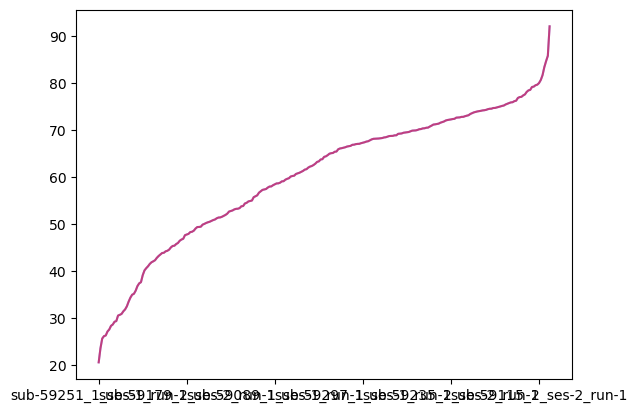

In [64]:
stroke_even_unharmonized.reset_index()['age'].plot(color='blue', alpha= 0.5)
evens_harmonized['age'].plot(color= 'red', alpha= 0.5)

In [82]:
stroke_even_unharmonized.reset_index()['wmh_vol'].describe()

count    257.000000
mean       1.712286
std        0.994238
min       -0.592397
25%        1.016317
50%        1.545646
75%        2.340459
max        4.176800
Name: wmh_vol, dtype: float64

In [89]:
differences = (stroke_even_unharmonized.reset_index()['wmh_vol'].values - evens_harmonized['wmh_vol'].values)#.describe()

In [97]:
diff_frame = pd.DataFrame(differences)
diff_frame.mean()

0   -0.012555
dtype: float64

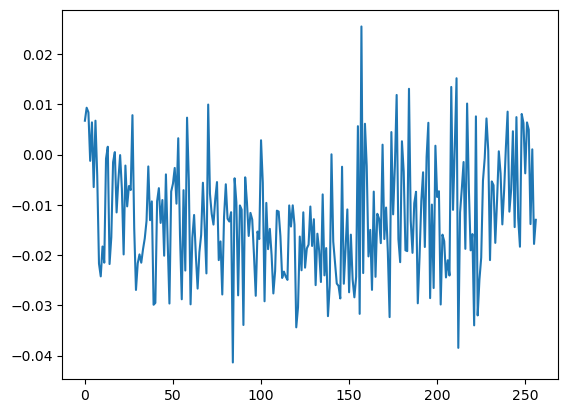

In [107]:
plt.plot(diff_frame)

In [ ]:
# floating pont differences should be 10 to the minus 8 or 10 to the minus 16

In [ ]:
## use creators test case, and see if we get the same kinds of results

C:\Users\CandaceMoore\miniconda3\envs\neuron_go\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

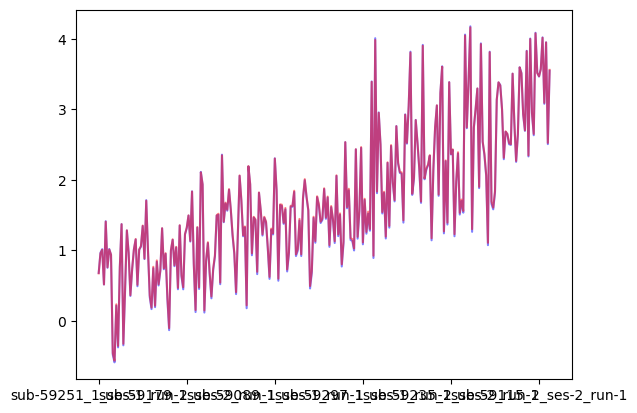

In [108]:
stroke_even_unharmonized.reset_index()['wmh_vol'].plot(color='blue', alpha= 0.5)
evens_harmonized['wmh_vol'].plot(color= 'red', alpha= 0.5)

C:\Users\CandaceMoore\miniconda3\envs\neuron_go\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

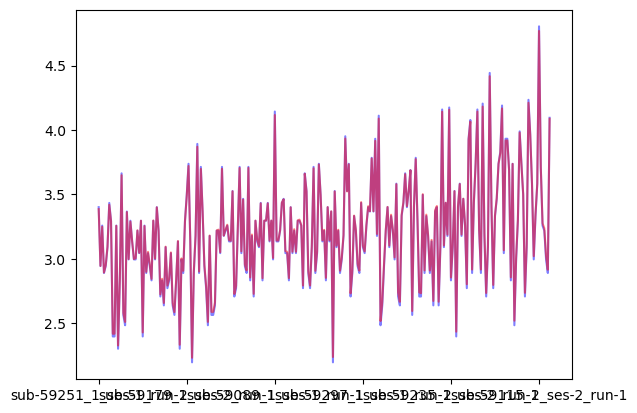

In [109]:
stroke_even_unharmonized.reset_index()['wmh_count'].plot(color='blue', alpha= 0.5)
evens_harmonized['wmh_count'].plot(color= 'red', alpha= 0.5)

<AxesSubplot:>

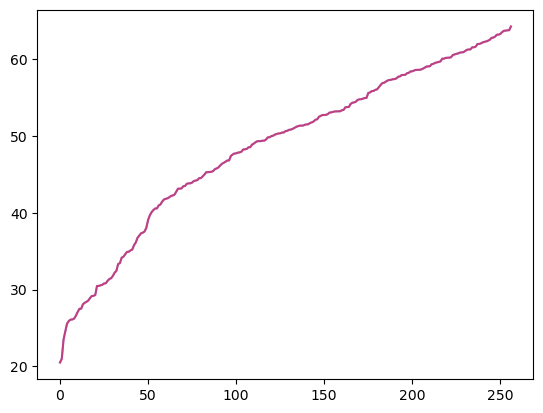

In [110]:
stroke_top_unharmonized.reset_index()['age'].plot(color='blue', alpha= 0.5)
top_harmonized['age'].plot(color= 'red', alpha= 0.5)

<AxesSubplot:>

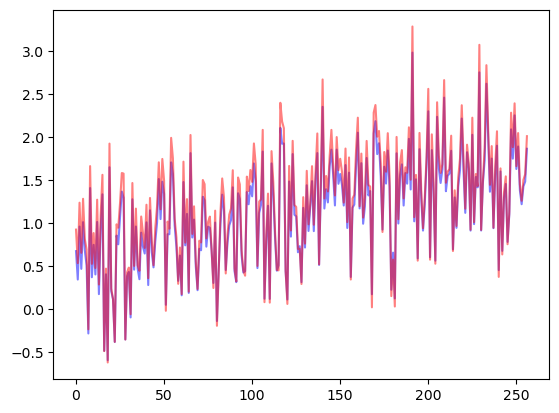

In [111]:
stroke_top_unharmonized.reset_index()['wmh_vol'].plot(color='blue', alpha= 0.5)
top_harmonized['wmh_vol'].plot(color= 'red', alpha= 0.5)

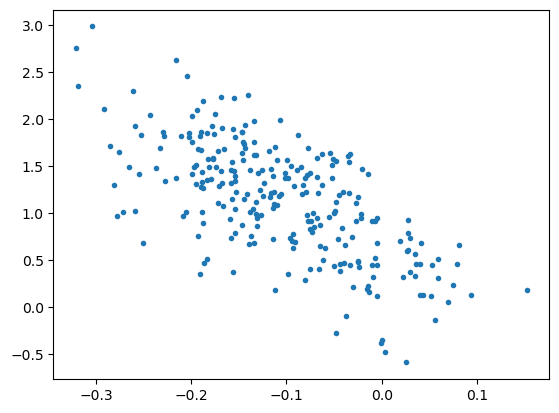

In [116]:
plt.plot(difference, stroke_top_unharmonized.reset_index()['wmh_vol'].values, '.')

In [114]:
difference = (stroke_top_unharmonized.reset_index()['wmh_vol'].values - top_harmonized['wmh_vol'].values)
difference

array([-0.2502346114680454, -0.19073273575408828, -0.2779009761962078,
       -0.18676789438945646, -0.27206409114608965, -0.13361286302867592,
       -0.18318913132871584, -0.048235253991464, -0.2551581899160251,
       -0.1560649314595146, -0.13689576166976547, -0.07540683837455475,
       -0.2589696594432742, -0.11218903619085702, -0.1596078097275504,
       -0.2274060175467827, 0.0032675659011591196, -0.06604082851634496,
       0.026018840120377473, -0.27546857774719036, -0.030071946343110945,
       -0.005373407006410397, -0.0008815914933376634,
       -0.13089292941948072, -0.19296676975806593, -0.16609892509322322,
       -0.21596697093072326, -0.28129475603213594, 0.0005169492922537655,
       -0.044081173713790056, -0.050468135940197, -0.0373350188153191,
       -0.18942715001782195, -0.04403105114771938, -0.20841588868951944,
       -0.03998896077726405, -0.09827669508079556, -0.18806382606703653,
       -0.1584017798851285, -0.06485942296175196, -0.20499293002537966,
      

In [112]:
stroke_top_unharmonized.reset_index()['wmh_vol'].values - top_harmonized['wmh_vol'].values

array([-0.2502346114680454, -0.19073273575408828, -0.2779009761962078,
       -0.18676789438945646, -0.27206409114608965, -0.13361286302867592,
       -0.18318913132871584, -0.048235253991464, -0.2551581899160251,
       -0.1560649314595146, -0.13689576166976547, -0.07540683837455475,
       -0.2589696594432742, -0.11218903619085702, -0.1596078097275504,
       -0.2274060175467827, 0.0032675659011591196, -0.06604082851634496,
       0.026018840120377473, -0.27546857774719036, -0.030071946343110945,
       -0.005373407006410397, -0.0008815914933376634,
       -0.13089292941948072, -0.19296676975806593, -0.16609892509322322,
       -0.21596697093072326, -0.28129475603213594, 0.0005169492922537655,
       -0.044081173713790056, -0.050468135940197, -0.0373350188153191,
       -0.18942715001782195, -0.04403105114771938, -0.20841588868951944,
       -0.03998896077726405, -0.09827669508079556, -0.18806382606703653,
       -0.1584017798851285, -0.06485942296175196, -0.20499293002537966,
      

In [ ]:
stroke_bottom_unharmonized.reset_index()['wmh_vol'].plot(color='blue', alpha= 0.5)
bottom_harmonized['wmh_vol'].plot(color= 'red', alpha= 0.5)

In [ ]:
stroke_top_unharmonized.reset_index()['wmh_count'].plot(color='blue', alpha= 0.5)
top_harmonized['wmh_count'].plot(color= 'red', alpha= 0.5)

In [ ]:
stroke_bottom_unharmonized.reset_index()['wmh_count'].plot(color='blue', alpha= 0.5)
bottom_harmonized['wmh_count'].plot(color= 'red', alpha= 0.5)

In [ ]:
bottom_harmonized['wmh_count'].hist(alpha = 0.5)

top_harmonized['wmh_count'].hist(alpha = 0.5)

## This is not the whole story, we must apply logarithm after the data split...then do again

then the features may not pull apart....


In [ ]:
stroke_top_unharmonized_no_log = har.top_and_bottom_by_column(StrokeMRI, 'age')[0]
stroke_bottom_unharmonized_no_log = har.top_and_bottom_by_column(StrokeMRI, 'age')[1]

In [ ]:
stroke_top_unharmonized_proper_log = har.log_out_columns(stroke_top_unharmonized_no_log, ['wmh_vol', 'wmh_count'])
stroke_bottom_unharmonized_proper_log = har.log_out_columns(stroke_bottom_unharmonized_no_log, ['wmh_vol', 'wmh_count'])

In [ ]:
both_togetherF3, ftF3, btF3, feature_dictF3, len13, len23 = har.prep_for_neurocombat(
    stroke_top_unharmonized_proper_log,
    stroke_bottom_unharmonized_proper_log)

In [ ]:
ftF3.to_csv('ftF3_UH.csv')

In [ ]:
data3 = np.genfromtxt('ftF3_UH.csv', delimiter=",", skip_header=1)
data3 = data3[:, 1:]
data3

In [ ]:
# Specifying the batch (scanner variable) as well as a sex covariate to preserve:
first_columns_as_one = [1] * len13
last_columns_as_two = [2] * len23
covars3 = {'batch':first_columns_as_one + last_columns_as_two,
          'sex':both_togetherF3.loc['sex',:].values.tolist(),
           'age':both_togetherF3.loc['age',:].values.tolist(),} 
covars3 = pd.DataFrame(covars3) 

In [ ]:
covars3

In [ ]:
# specifify sex as categorical
categorical_cols = ['sex']
# to specify the name of the variable that encodes for the scanner/batch covariate:
batch_col_mine = 'batch'
our_continuous_col=['age']
# harmonization step:
data_combat3 = neuroCombat(dat=data3,
    covars=covars3,
    batch_col=batch_col_mine,
    continuous_cols=our_continuous_col,
    categorical_cols=categorical_cols)["data"]

In [ ]:
neurocombat3 = pd.DataFrame(data_combat3)
neurocombat3.head(2)

In [ ]:
topperF3 = har.make_topper(btF3,'age', 'sex')

In [ ]:
bottom3 = neurocombat3.reset_index(drop=False)
bottom3 = bottom3.rename(columns={"index": "char"})
bottom3.columns = topperF3.columns

In [ ]:
back_together3 = pd.concat([topperF3, bottom3])
back_together3 = back_together3.T
#back_together3

In [ ]:
new_header3 = back_together3.iloc[0] #grab the first row for the header
back_together3.columns = new_header3 #set the header row as the df header
back_together3 = back_together3[1:]
#back_together2

In [ ]:
bottom_pl_harmonized = back_together3.tail(len23)
top_pl_harmonized = back_together3.head(len13)

In [ ]:
top_pl_harmonized = top_pl_harmonized.rename(feature_dictF3, axis='columns')
bottom_pl_harmonized= bottom_pl_harmonized.rename(feature_dictF3, axis='columns')

Save off to harmonized csv files?

In [ ]:
stroke_top_unharmonized_proper_log

In [ ]:
#StrokeMRI['wmh_vol'].describe()

In [ ]:
#stroke_top_unharmonized_proper_log['wmh_vol'].describe()

In [ ]:
# top_pl_harmonized['wmh_vol'].min()

In [ ]:
stroke_top_unharmonized_proper_log.reset_index()['wmh_vol'].plot(color='blue', alpha= 0.5)
top_pl_harmonized['wmh_vol'].plot(color= 'red', alpha= 0.5)

In [ ]:
# harmonized_dfs = [top_pl_harmonized, bottom_pl_harmonized]
# complete_harmonised = pd.concat(harmonized_dfs)
# complete_harmonised 

In [ ]:
stroke_top_unharmonized_proper_log.head(3)

In [ ]:
top_pl_unharm_order = stroke_top_unharmonized_proper_log.drop('Unnamed: 0', axis=1)
top_pl_unharm_order['harmonization'] ="UH"
top_pl_unharm_order['site'] = "s"
top_pl_unharm_order.head(3)

In [ ]:
top_pl_harm_order = top_pl_harmonized.reset_index()
top_pl_harm_order = top_pl_harm_order.rename(columns={'index': 'participant_id'})
top_pl_harm_order['harmonization'] = "H"
top_pl_harm_order['site'] = "s"
top_pl_harm_order.head(3)

The below cell is added as a hypothetical to demo graphing capabilities

In [ ]:
top_pl_harm_order["batch"] = 1
top_pl_unharm_order["batch"] = 1
top_pl_harm_order[:40]["batch"] = 2
top_pl_unharm_order[:40]["batch"] = 2

In [ ]:
def compare_harm_one_site_violins(
        unharmonized_df,
        harmonized_df,
        feature_list,
        chosen_feature="sex"
):
    """
    Create a violin plot on single site harmonization by features,
    split on a binary feature of choice which defaults to sex.
    """
    for feat in feature_list:
        complete_merg = pd.concat(
            [unharmonized_df, harmonized_df]).reset_index(drop=True)
        complete_merg[feat] = complete_merg[feat].astype('float64')
        sns.set_style("whitegrid")
        y_axis = feat
        g = sns.catplot(
            data=complete_merg,
            x='harmonization', y=y_axis, hue=chosen_feature,
            split=True, inner='quartile', kind='violin',
            height=4, aspect=0.7, palette=['pink', 'blue'], alpha=0.4)

        lowest_on_graph = complete_merg[y_axis].min() - 0.5
        plt.ylim((lowest_on_graph, complete_merg[y_axis].max() * 1.5))
        plt.title(feat)
        plt.show()

In [ ]:
compare_harm_one_site_violins(top_pl_unharm_order, top_pl_harm_order, ['gm_vol', 'wm_vol', 'wmh_count', 'wmh_vol'])

In [ ]:
# 1. make sure not artifact of density estimate- 
2. make a plot of differences between harmonization, and real, over age, 
3. histograms, and differences
4. compare to a case on different datasets, and see how much harmonization changed


In [ ]:
# nw let's just  pretend to show other graphing
har.compare_harm_multi_site_violins(top_pl_unharm_order, top_pl_harm_order, ['gm_vol', 'wm_vol', 'wmh_count', 'wmh_vol'])